In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0085_CDS_30epr1fr_BALANCED_ResNet18_LateralityFixThenFlipAgain')
clog_path = 'experiments/0086_CDS_30epr1fr_BALANCED_ResNet18_LateralityFixThenFlipAgainClient_Logs'
all_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/all')

In [3]:
pickle_file = 'log.pkl'
with open(all_path.joinpath(pickle_file), 'rb') as handle:
    CDS_metrics = pickle.load(handle)
    

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
CDS_metrics['LMLD_train_accuracy']

[]

In [6]:
CDS_metrics

{'local_loss': {0: [0.6158488988876343,
   0.6063615083694458,
   0.5416576862335205,
   0.6445496082305908,
   0.3643622100353241,
   0.2579294741153717,
   0.700147271156311,
   0.4053659737110138,
   0.410591185092926,
   0.2677077353000641,
   0.348111629486084,
   0.1776287853717804,
   0.0879649743437767,
   0.11994063854217529,
   0.10884536802768707,
   0.31825530529022217,
   0.0852564200758934,
   0.11232945322990417,
   0.018561696633696556,
   0.11367371678352356,
   0.014866726472973824,
   0.05621230974793434,
   0.27562105655670166,
   0.019831912592053413,
   0.02475341409444809,
   0.03317424654960632,
   0.0587800107896328,
   0.004321357700973749,
   0.01790335215628147,
   0.0737544521689415],
  1: []},
 'GMLD_val_loss': {0: 0.7255603711324177, 1: []},
 'LMLD_val_loss': {0: [1.775765299797058], 1: []},
 'local_accuracy': [],
 'local_sensitivity': [],
 'local_specificity': [],
 'local_val_predictions': [],
 'GMLD_accuracy': [0.6936895439889452],
 'GMLD_true_positives

In [13]:
CDS_metrics['LMLD_val_accuracy']

[0.7554122524182404]

## Curve

In [ ]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Isolated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_isolated.png')

In [ ]:
cmmd_metrics['local_val_loss']

In [ ]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

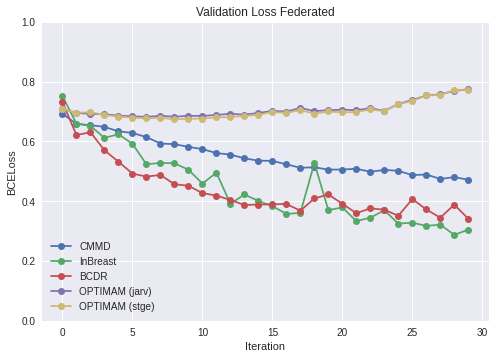

In [20]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_MEDIAN.png')

NameError: name 'cmmd_f1' is not defined

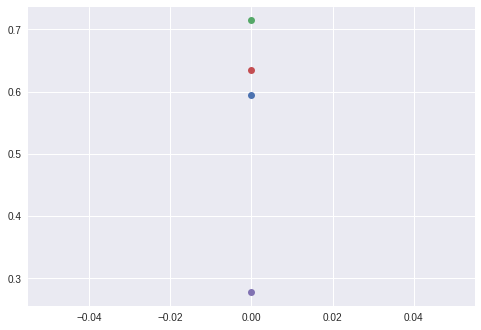

In [20]:
plt.plot(steps, jarv_f1,'-o', label='jarv')
plt.plot(steps, stge_f1,'-o', label='stge')
plt.plot(steps, bcdr_f1,'-o', label='bcdr')
plt.plot(steps, inbreast_f1,'-o', label='inbreast')
plt.plot(steps, cmmd_f1,'-o', label='cmmd')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('F1 Score')
plt.title('F1 Score per Center')
plt.savefig('./plots/FMedian_F1_Isolated.png')